# Importing Libraries 

In [10]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = all


import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics


#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

# Loading Data

In [23]:
trainDF = pd.read_csv('data/cs-training.csv', index_col=0)
# trainDF.head(10)
# trainDF.info()
trainDF = trainDF.dropna()
#can drop NaN values
trainDF = trainDF.dropna()

#Can use this for cross-validation
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
# for train_index, test_index in cv.split(trainDF):
#     print("TRAIN:", train_index, "TEST:", test_index)

# Data Visualization

/home/sohail/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/sohail/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/home/sohail/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


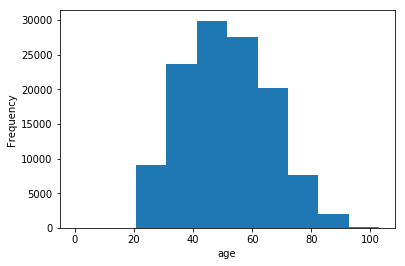

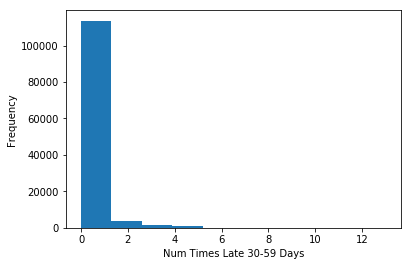

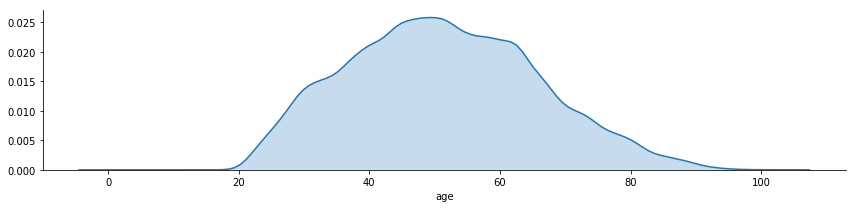

In [26]:
#Historam of Age
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(1,1, 1) #1 rows, 1 column, 1st plot
ax2 = fig2.add_subplot(1,1, 1) #1 rows,1 column, 1st plot

n, bins, patches = ax1.hist(trainDF['age'])
ax1.set_xlabel('age')
ax1.set_ylabel('Frequency')
# fig1.savefig("hist_age.pdf", format='pdf')

trainDF.is_copy = False
trainDF['NumberOfTime30-59DaysPastDueNotWorse'].loc[(trainDF['NumberOfTime30-59DaysPastDueNotWorse']==98) 
    | (trainDF['NumberOfTime30-59DaysPastDueNotWorse']==96)] = trainDF['NumberOfTime30-59DaysPastDueNotWorse'].median()
#histogram of the NumberOfTime30-59DaysPastDueNotWorse
n, bins, patches = ax2.hist(trainDF['NumberOfTime30-59DaysPastDueNotWorse'])
ax2.set_xlabel('Num Times Late 30-59 Days')
ax2.set_ylabel('Frequency')
# fig2.savefig("hist_late.pdf", format='pdf')


#can also visualize data with KDE plot
#similar to histogram in that it treats each data point as Gaussian distribution
#and then takes cumulative probability function

# Set the figure equal to a facetgrid with the training set as data and change the aspect ratio
fig = sns.FacetGrid(trainDF, aspect=4)
# Next use map to plot all the possible kdeplots for the 'age' values
sns_plot = fig.map(sns.kdeplot,'age',shade= True)